# Speech Emotion Recognition

Speech is the most natural way of expressing ourselves as humans. It is only natural
then to extend this communication medium to computer applications. We define
speech emotion recognition (SER) systems as a collection of methodologies that
process and classify speech signals to detect the embedded emotions

In [1]:
import numpy as np
import pandas as pd

#To split the data
from sklearn.model_selection import train_test_split

#for the confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, classification_report

#useful for plotting
import matplotlib.pyplot as plt
import math
%matplotlib inline
import seaborn as sns
import librosa.display

#Useful for training and data normalization
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import utils

#For reading the audio paths
import os
from pathlib import Path
import librosa

#To listen to the audio
import IPython

#To prevent showing the warnings
import warnings
warnings.filterwarnings('ignore')

#For training the data.
import torch
from torch import nn
from torchsummary import summary
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Reading and understanding the data.

### We will use the Crema dataset which is speech emotion:

#### The classes we have:

SAD - sadness

ANG - angry

DIS  - disgust

FEA  - fear

HAP  - happy

NEU  - neutral

In [2]:
#the crema path
crema_path = "/content/gdrive/MyDrive/Crema/"

In [3]:
#Empty list to append each audio with it's corresponding class.
crema=[]
#looping through the file
for wav in os.listdir(crema_path):
    #splitting each line by -
    audio = wav.partition(".wav")[0].split('_')
    if audio[2]=='SAD': #if it's a sad audio
        crema.append(('sad',crema_path+'/'+wav))
    elif audio[2]=='ANG': #if it is an angry audio
        crema.append(('angry',crema_path+'/'+wav))
    elif audio[2]=='DIS': #if it is a disgust audio
        crema.append(('disgust',crema_path+'/'+wav))
    elif audio[2]=='FEA': #if it is a fear audio
        crema.append(('fear',crema_path+'/'+wav))
    elif audio[2]=='HAP': # if it is a happy audio
        crema.append(('happy',crema_path+'/'+wav))
    elif audio[2]=='NEU': # if it is a neautral audio.
        crema.append(('neutral',crema_path+'/'+wav))
#covert to a dataframe with 2 coloumns
df=pd.DataFrame.from_dict(crema)
df.rename(columns={0:'Emotion',1:'audio_Path'},inplace=True)

In [4]:
#printing the data frame
df

,Emotion,audio_Path
0,disgust,/content/gdrive/MyDrive/Crema//1080_IWL_DIS_XX...
1,sad,/content/gdrive/MyDrive/Crema//1080_ITS_SAD_XX...
2,angry,/content/gdrive/MyDrive/Crema//1081_IEO_ANG_HI...
3,fear,/content/gdrive/MyDrive/Crema//1080_ITS_FEA_XX...
4,happy,/content/gdrive/MyDrive/Crema//1081_ITS_HAP_XX...
...,...,...
7437,disgust,/content/gdrive/MyDrive/Crema//1007_ITH_DIS_XX...
7438,fear,/content/gdrive/MyDrive/Crema//1006_WSI_FEA_XX...
7439,disgust,/content/gdrive/MyDrive/Crema//1006_TSI_DIS_XX...
7440,sad,/content/gdrive/MyDrive/Crema//1006_TIE_SAD_XX...


In [5]:
#the unique values in the data frame
df['Emotion'].unique()

array(['disgust', 'sad', 'angry', 'fear', 'happy', 'neutral'],
      dtype=object)

### visualizing the data

<Axes: title={'center': 'Emotion Count'}, xlabel='Emotions', ylabel='Count'>

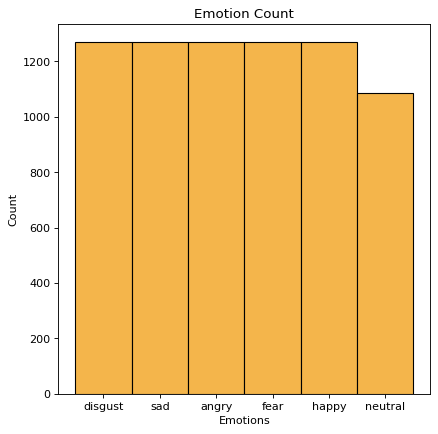

In [6]:
# counting audio categorized by emotions
plt.figure(figsize=(6,6), dpi=80)
plt.title("Emotion Count")
plt.xlabel('Emotions')
plt.ylabel('Count')
sns.histplot(df.Emotion, color='#F19C0E')

### Plotting the waveform for each class

In [7]:
#To plot the waveform.
def wave_plot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(f'{emotion} emotion waveplot', size=10)
    librosa.display.waveshow(y=data,sr=sr)

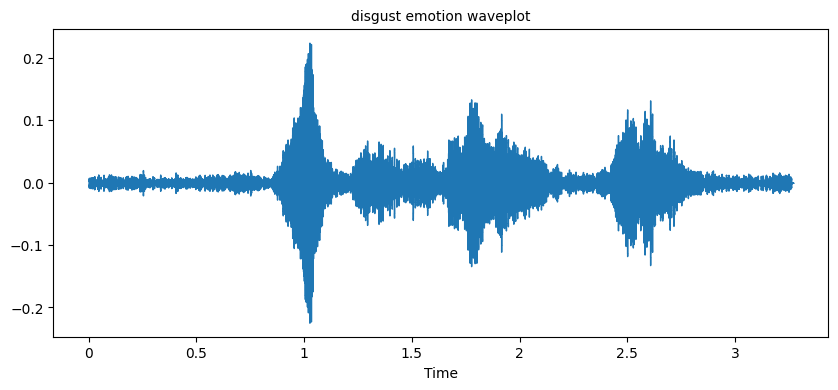

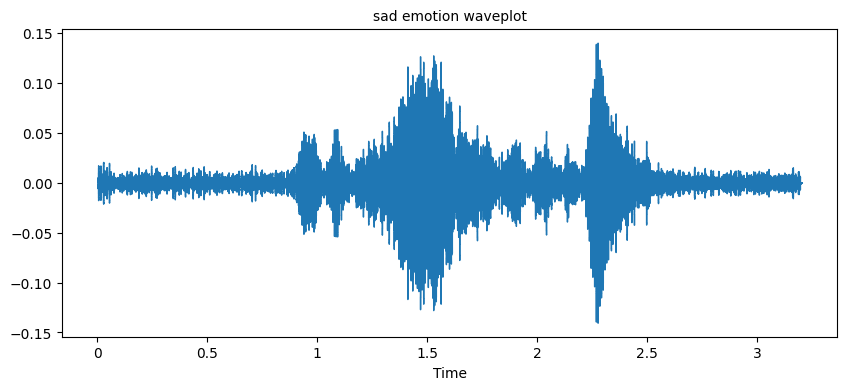

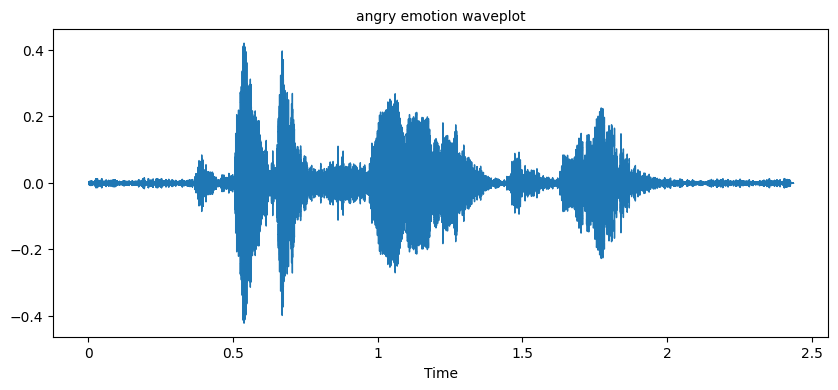

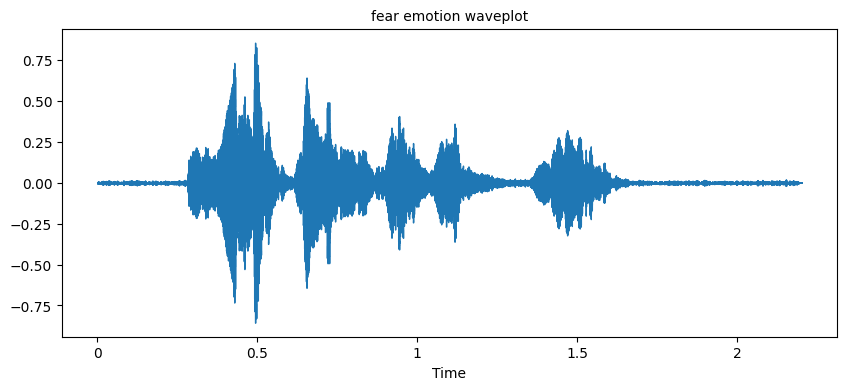

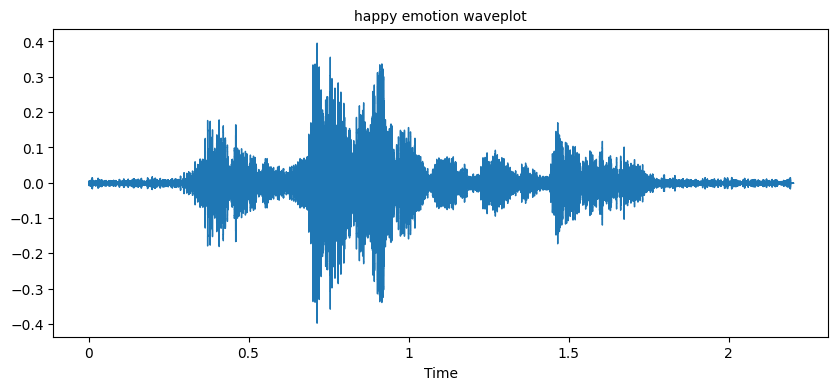

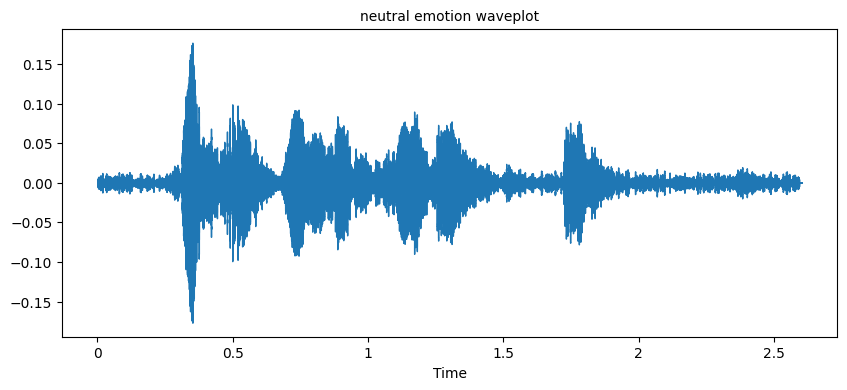

In [8]:
audio_path=[]
for emotion in df['Emotion'].unique():
    #Getting the path of each audio.
    path=np.array(df['audio_Path'][df['Emotion']==emotion])[1]
    #getting the samples and sr of the audios
    data, sr=librosa.load(path) # the data is the a vector of the audio represntation.
    #Plotting the waveform of each class.
    wave_plot(data, sr,emotion)
    audio_path.append(path)

### Listening to each emotion

In [9]:
#The angry emotion.
print('Angry emotion Audio\n')
IPython.display.Audio(audio_path[0])

Angry emotion Audio



In [10]:
#The disgust disgust.
print('disgust emotion Audio\n')
IPython.display.Audio(audio_path[1])

disgust emotion Audio



In [11]:
#The fear emotion.
print('Fear emotion Audio\n')
IPython.display.Audio(audio_path[2])

Fear emotion Audio



In [12]:
#The happy emotion.
print('Happy emotion Audio\n')
IPython.display.Audio(audio_path[3])

Happy emotion Audio



In [13]:
#The Neutral emotion.
print('Neutral emotion Audio\n')
IPython.display.Audio(audio_path[4])

Neutral emotion Audio



In [14]:
#The Sad emotion.
print('Sad emotion Audio\n')
IPython.display.Audio(audio_path[5])

Sad emotion Audio

